In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler,LabelEncoder
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
train_df = pd.read_csv(Path('Resources/2019loans.csv'))
test_df = pd.read_csv(Path('Resources/2020Q1loans.csv'))

In [3]:
# Convert categorical data to numeric and separate target feature for training data
train_df.head()

,Unnamed: 0,index,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,57107,57107,13375.0,0.1797,483.34,MORTGAGE,223000.0,Not Verified,low_risk,n,...,100.0,50.0,0.0,0.0,577150.0,122018.0,32000.0,170200.0,N,N
1,141451,141451,21000.0,0.1308,478.68,MORTGAGE,123000.0,Source Verified,low_risk,n,...,85.0,33.3,0.0,0.0,132750.0,27896.0,15900.0,35398.0,N,N
2,321143,321143,20000.0,0.1240,448.95,MORTGAGE,197000.0,Source Verified,low_risk,n,...,85.7,33.3,0.0,0.0,628160.0,114043.0,22600.0,90340.0,N,N
3,11778,11778,3000.0,0.1240,100.22,RENT,45000.0,Not Verified,low_risk,n,...,100.0,16.7,1.0,0.0,42006.0,20761.0,19900.0,15406.0,N,N
4,169382,169382,30000.0,0.1612,1056.49,MORTGAGE,133000.0,Source Verified,low_risk,n,...,100.0,66.7,0.0,0.0,283248.0,109056.0,79500.0,58778.0,N,N


In [4]:
# drop cols not which are required
# separate  X and y from train dataset

train_df=train_df.drop(['Unnamed: 0','index'],axis=1)
X_train_nonencoded =train_df.drop('loan_status',axis=1)


In [5]:
# converting categorical data with numeric data

X_train = pd.get_dummies(X_train_nonencoded)
print(X_train.columns)
X_train

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
       'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
       'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_in

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,verification_status_Verified,pymnt_plan_n,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,hardship_flag_N,hardship_flag_Y,debt_settlement_flag_N,debt_settlement_flag_Y
0,13375.0,0.1797,483.34,223000.0,29.99,0.0,0.0,15.0,0.0,39728.0,...,0,1,0,1,1,0,1,0,1,0
1,21000.0,0.1308,478.68,123000.0,11.26,2.0,0.0,16.0,0.0,9585.0,...,0,1,0,1,1,0,1,0,1,0
2,20000.0,0.1240,448.95,197000.0,11.28,0.0,0.0,12.0,0.0,16708.0,...,0,1,0,1,1,0,1,0,1,0
3,3000.0,0.1240,100.22,45000.0,18.08,0.0,0.0,12.0,1.0,8809.0,...,0,1,0,1,1,0,1,0,1,0
4,30000.0,0.1612,1056.49,133000.0,27.77,0.0,2.0,13.0,0.0,65420.0,...,0,1,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12175,19975.0,0.2565,801.09,28000.0,28.42,0.0,0.0,15.0,0.0,9679.0,...,0,1,0,1,1,0,1,0,1,0
12176,15000.0,0.1774,540.34,50000.0,23.43,4.0,0.0,16.0,0.0,3193.0,...,1,1,0,1,1,0,1,0,1,0
12177,3600.0,0.1862,131.28,60000.0,28.80,0.0,1.0,14.0,0.0,11804.0,...,0,1,0,1,1,0,1,0,1,0
12178,15000.0,0.0881,475.68,62000.0,11.44,0.0,0.0,5.0,0.0,157.0,...,0,1,0,1,0,1,1,0,1,0


In [23]:
# convert categorical data to numeric data in y-train

def encode_loan_type(loan_status):
    if loan_status =='low_risk':
        return 0
    elif loan_status =='high_risk':
        return 1
    
train_df['loan_status']= train_df['loan_status'].apply(encode_loan_type)

train_df['loan_status'].unique()  
    

array([0, 1])

In [24]:
y_train = train_df['loan_status']
target_names=['low_risk','high_risk']

In [25]:
# Convert categorical data to numeric and separate target feature for testing data

test_df.head()

,Unnamed: 0,index,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,67991,67991,40000.0,0.0819,814.70,MORTGAGE,140000.0,Not Verified,low_risk,n,...,97.7,0.0,0.0,0.0,527975.0,70914.0,74600.0,99475.0,N,N
1,25429,25429,6000.0,0.1524,208.70,RENT,55000.0,Not Verified,low_risk,n,...,66.7,0.0,0.0,0.0,34628.0,23460.0,5900.0,23628.0,N,N
2,38496,38496,3600.0,0.1695,128.27,RENT,42000.0,Not Verified,low_risk,n,...,100.0,0.0,0.0,0.0,23100.0,19183.0,7300.0,15000.0,N,N
3,19667,19667,20000.0,0.1524,478.33,RENT,100000.0,Not Verified,low_risk,n,...,100.0,50.0,0.0,0.0,56481.0,43817.0,13800.0,35981.0,N,N
4,37505,37505,3600.0,0.1240,120.27,RENT,50000.0,Not Verified,low_risk,n,...,100.0,25.0,0.0,0.0,45977.0,32448.0,21000.0,24977.0,N,N


In [6]:
test_df=test_df.drop(['Unnamed: 0','index'],axis=1)
X_test_nonencoded =test_df.drop('loan_status',axis=1)

In [7]:
X_test = pd.get_dummies(X_test_nonencoded)
print(X_test.columns)
X_test.head()

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
       'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
       'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_in

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,verification_status_Source Verified,verification_status_Verified,pymnt_plan_n,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,hardship_flag_N,hardship_flag_Y,debt_settlement_flag_N
0,40000.0,0.0819,814.70,140000.0,19.75,0.0,1.0,18.0,0.0,9471.0,...,0,0,1,0,1,1,0,1,0,1
1,6000.0,0.1524,208.70,55000.0,11.52,2.0,0.0,8.0,0.0,1280.0,...,0,0,1,0,1,1,0,1,0,1
2,3600.0,0.1695,128.27,42000.0,6.74,0.0,0.0,6.0,0.0,4757.0,...,0,0,1,0,1,1,0,1,0,1
3,20000.0,0.1524,478.33,100000.0,12.13,0.0,2.0,7.0,0.0,12731.0,...,0,0,1,0,1,1,0,1,0,1
4,3600.0,0.1240,120.27,50000.0,16.08,0.0,3.0,6.0,0.0,10413.0,...,0,0,1,0,1,1,0,1,0,1


In [28]:
y_test = test_df['loan_status'].apply(encode_loan_type)
y_test.unique()


array([0, 1])

In [29]:
# add missing dummy variables to testing set
missing_cols = set(X_train.columns ) - set(X_test.columns )
print(missing_cols)
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    X_test[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
X_test = X_test[X_train.columns]

{'debt_settlement_flag_Y'}


In [30]:
X_train.shape

(12180, 92)

In [31]:
X_test.shape

(4702, 92)

## Fit the models on unscaled data and check the scores for both the models

##### Prediction : Models will not fit properly on unscaled data, so scores might not be good. Random Forest should work better as it will take average of multiple trees and will try to give weight to important features.

In [40]:
# Train the Logistic Regression model on the unscaled data and print the model score
from sklearn.linear_model import LogisticRegression

classifier=LogisticRegression(max_iter=1000,C=.75,class_weight='balanced',random_state=1).fit(X_train,y_train)
y_pred=classifier.predict(X_test)

print(f"Training Data Score: {classifier.score(X_train,y_train)}")
print(f"Testing Data Score: {classifier.score(X_test,y_test)}")
print(classification_report(y_test,y_pred,target_names=target_names))


Training Data Score: 0.7155172413793104
Testing Data Score: 0.5876222883879201
              precision    recall  f1-score   support

    low_risk       0.56      0.81      0.66      2351
   high_risk       0.66      0.36      0.47      2351

    accuracy                           0.59      4702
   macro avg       0.61      0.59      0.57      4702
weighted avg       0.61      0.59      0.57      4702



/Users/Mimi/opt/anaconda3/envs/venv/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [41]:
# Train a Random Forest Classifier model and print the model score
from sklearn.ensemble import RandomForestClassifier

classifier=RandomForestClassifier(random_state=1,n_estimators=50,max_depth=8,max_samples=500,min_samples_split=3).fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print(f"Training Data Score: {classifier.score(X_train,y_train)}")
print(f"Testing Data Score: {classifier.score(X_test,y_test)}")
print(classification_report(y_test,y_pred,target_names=target_names))


Training Data Score: 0.75311986863711
Testing Data Score: 0.6739685240323267
              precision    recall  f1-score   support

    low_risk       0.70      0.61      0.65      2351
   high_risk       0.65      0.74      0.69      2351

    accuracy                           0.67      4702
   macro avg       0.68      0.67      0.67      4702
weighted avg       0.68      0.67      0.67      4702



## Conclusion:
##### Although models did not work satisfactorily on unscaled data, Random Forest model worked better than Logistic regression model on unscaled data.

### Fit the models on scaled data and checking the scores for both models

In [42]:
# Scale the data

scaler= StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)


In [44]:
# Train the Logistic Regression model on the scaled data and print the model score
classifier=LogisticRegression(max_iter=1000,C=.75,class_weight='balanced',random_state=1).fit(X_train_scaled,y_train)

y_pred=classifier.predict(X_test_scaled)

print(f"Training Data Score: {classifier.score(X_train_scaled,y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled,y_test)}")
print(classification_report(y_test,y_pred,target_names=target_names))

Training Data Score: 0.7082101806239737
Testing Data Score: 0.7681837515950659
              precision    recall  f1-score   support

    low_risk       0.76      0.77      0.77      2351
   high_risk       0.77      0.76      0.77      2351

    accuracy                           0.77      4702
   macro avg       0.77      0.77      0.77      4702
weighted avg       0.77      0.77      0.77      4702



In [19]:
# Train the Logistic Regression model on the scaled data and print the model score
classifier=LogisticRegression(max_iter=1000,C=.75,class_weight='balanced',random_state=1).fit(X_train_scaled,y_train)

y_pred=classifier.predict(X_test_scaled)

print(f"Training Data Score: {classifier.score(X_train_scaled,y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled,y_test)}")
print(classification_report(y_test,y_pred,target_names=target_names))

Training Data Score: 0.7082101806239737
Testing Data Score: 0.7681837515950659
              precision    recall  f1-score   support

   high_risk       0.77      0.76      0.77      2351
    low_risk       0.76      0.77      0.77      2351

    accuracy                           0.77      4702
   macro avg       0.77      0.77      0.77      4702
weighted avg       0.77      0.77      0.77      4702



### Conclusion:
#### Score of Logistic regression model significantly improved on scaled dataset. But there is no significant change in score for RandomForest Model
 

In [45]:
# Train a Random Forest Classifier model on the scaled data and print the model score

classifier=RandomForestClassifier(random_state=1,n_estimators=50,max_depth=8,max_samples=500,min_samples_split=3).fit(X_train_scaled,y_train)
y_pred=classifier.predict(X_test_scaled)
print(f"Training Data Score: {classifier.score(X_train_scaled,y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled,y_test)}")
print(classification_report(y_test,y_pred,target_names=target_names))


Training Data Score: 0.7538587848932676
Testing Data Score: 0.6731178222033177
              precision    recall  f1-score   support

    low_risk       0.70      0.61      0.65      2351
   high_risk       0.65      0.74      0.69      2351

    accuracy                           0.67      4702
   macro avg       0.68      0.67      0.67      4702
weighted avg       0.68      0.67      0.67      4702



### Trying to search best parameters for randomforest classifier using RandomizedSearchCV

## Try to search best parameters for random forest classifier using RandomizedSearchCV

In [46]:
from sklearn.model_selection import RandomizedSearchCV
param_grid={'n_estimators':np.arange(5,250,10),
            'max_depth':np.arange(1,20,1),
            'max_samples': np.arange(50,2000,50)}
            

In [47]:
classifier= RandomForestClassifier()
random_clf=RandomizedSearchCV(classifier,param_grid)
random_clf.fit(X_train_scaled,y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'max_samples': array([  50,  100,  150,  200,  250,  300,  350,  400,  450,  500,  550,
        600,  650,  700,  750,  800,  850,  900,  950, 1000, 1050, 1100,
       1150, 1200, 1250, 1300, 1350, 1400, 1450, 1500, 1550, 1600, 1650,
       1700, 1750, 1800, 1850, 1900, 1950]),
                                        'n_estimators': array([  5,  15,  25,  35,  45,  55,  65,  75,  85,  95, 105, 115, 125,
       135, 145, 155, 165, 175, 185, 195, 205, 215, 225, 235, 245])})

In [49]:
random_clf.best_params_

{'n_estimators': 245, 'max_samples': 1650, 'max_depth': 18}

In [50]:
random_clf.best_score_

0.747783251231527

In [51]:
y_pred=random_clf.predict(X_test_scaled)

In [52]:
print(classification_report(y_test,y_pred,target_names=target_names))

              precision    recall  f1-score   support

    low_risk       0.70      0.56      0.62      2351
   high_risk       0.63      0.76      0.69      2351

    accuracy                           0.66      4702
   macro avg       0.66      0.66      0.65      4702
weighted avg       0.66      0.66      0.65      4702



### Conclusion:
##### Scores for Random Forest model did not improve after fitting best parameters using RandomizedSearchCV as well.So Ligistic regression model worked better on this dataset.

## Trying to improve score by selecting important features based on Random Forest Classifier

In [53]:
classifier=RandomForestClassifier(random_state=1,n_estimators=50).fit(X_train_scaled,y_train)
features=classifier.feature_importances_

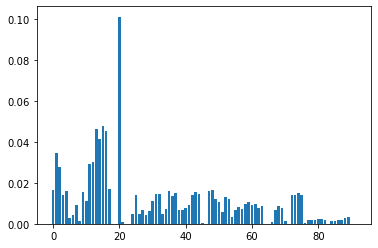

In [54]:
plt.bar(x=range(len(features)),height=features)
plt.show()

In [55]:
sel=SelectFromModel(classifier).fit(X_train_scaled,y_train)
sel.get_support()


array([ True,  True,  True,  True,  True, False, False, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True, False, False, False, False,  True, False,
       False, False, False,  True,  True,  True, False, False,  True,
        True,  True, False, False, False, False,  True,  True,  True,
       False, False,  True,  True,  True, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [56]:
X_train_selected=sel.transform(X_train)
X_test_selected=sel.transform(X_test)

In [57]:
X_train_selected.shape

(12180, 34)

In [58]:
X_test_selected.shape

(4702, 34)

In [59]:
scaler=StandardScaler().fit(X_train_selected)
X_train_selected_scaled= scaler.transform(X_train_selected)
X_test_selected_scaled=scaler.transform(X_test_selected)

In [60]:
classifier=RandomForestClassifier(random_state=1,n_estimators=50,max_depth=8,max_samples=500,min_samples_split=3).fit(X_train_selected_scaled,y_train)
y_pred=classifier.predict(X_test_selected_scaled)

print(f"Training Data Score: {classifier.score(X_train_selected_scaled,y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_selected_scaled,y_test)}")
print(classification_report(y_test,y_pred,target_names=target_names))


Training Data Score: 0.7588669950738917
Testing Data Score: 0.6614206720544449
              precision    recall  f1-score   support

    low_risk       0.67      0.63      0.65      2351
   high_risk       0.65      0.70      0.67      2351

    accuracy                           0.66      4702
   macro avg       0.66      0.66      0.66      4702
weighted avg       0.66      0.66      0.66      4702



In [61]:
classifier=LogisticRegression(max_iter=1000,C=.75,class_weight='balanced',random_state=1).fit(X_train_selected_scaled,y_train)
y_pred=classifier.predict(X_test_selected_scaled)

print(f"Training Data Score: {classifier.score(X_train_selected_scaled,y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_selected_scaled,y_test)}")
print(classification_report(y_test,y_pred,target_names=target_names))

Training Data Score: 0.7059113300492611
Testing Data Score: 0.7845597618034879
              precision    recall  f1-score   support

    low_risk       0.78      0.80      0.79      2351
   high_risk       0.79      0.77      0.78      2351

    accuracy                           0.78      4702
   macro avg       0.78      0.78      0.78      4702
weighted avg       0.78      0.78      0.78      4702



## Conclusion:
#### No significant improvement noticed in the scores after selection of important features from training dataset as well.